In [283]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [284]:
books_df = pd.read_csv('/content/books.csv')

In [285]:
books_df = books_df[['average_rating', 'ratings_count', 'work_text_reviews_count']].dropna()

In [286]:
books_df['target'] = (books_df['average_rating'] >= 4).astype(int)

In [287]:
features = books_df[['average_rating', 'ratings_count', 'work_text_reviews_count']].values
targets = books_df['target'].values

In [288]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [290]:
class BookDropoutNet(nn.Module):
    def __init__(self):
        super(BookDropoutNet, self).__init__()
        self.layer1 = nn.Linear(3, 16)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(16, 1)
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        return self.output_activation(self.output_layer(x))

In [291]:
model = BookDropoutNet()

In [292]:
train_X = torch.tensor(X_train, dtype=torch.float32)
train_y = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
test_X = torch.tensor(X_test, dtype=torch.float32)
test_y = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

In [293]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [294]:
training_losses = []
for epoch in range(20):
    model.train()
    predictions = model(train_X)
    loss = criterion(predictions, train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

Epoch 1: Loss = 0.7021
Epoch 2: Loss = 0.6842
Epoch 3: Loss = 0.6674
Epoch 4: Loss = 0.6516
Epoch 5: Loss = 0.6366
Epoch 6: Loss = 0.6221
Epoch 7: Loss = 0.6080
Epoch 8: Loss = 0.5942
Epoch 9: Loss = 0.5805
Epoch 10: Loss = 0.5669
Epoch 11: Loss = 0.5534
Epoch 12: Loss = 0.5400
Epoch 13: Loss = 0.5267
Epoch 14: Loss = 0.5135
Epoch 15: Loss = 0.5003
Epoch 16: Loss = 0.4872
Epoch 17: Loss = 0.4741
Epoch 18: Loss = 0.4611
Epoch 19: Loss = 0.4482
Epoch 20: Loss = 0.4353


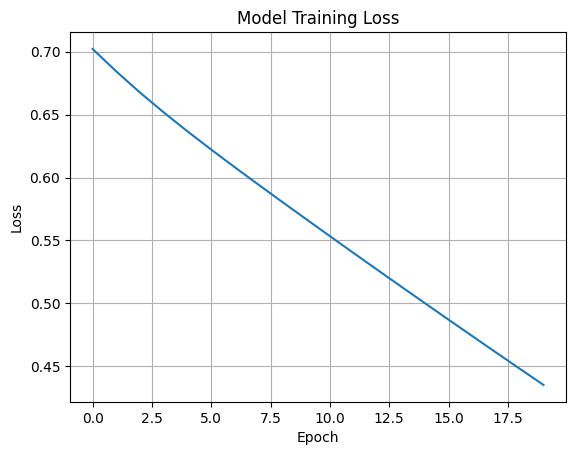

In [295]:
plt.plot(training_losses)
plt.title("Model Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [296]:
model.eval()
with torch.no_grad():
    test_predictions = model(test_X)
    predicted_classes = (test_predictions >= 0.5).float()

In [297]:
accuracy = accuracy_score(test_y, predicted_classes)
precision = precision_score(test_y, predicted_classes)
recall = recall_score(test_y, predicted_classes)
f1 = f1_score(test_y, predicted_classes)

In [298]:
print("Evaluation Results:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Evaluation Results:
Accuracy:  0.9475
Precision: 0.9110
Recall:    1.0000
F1 Score:  0.9534
